In [ ]:
!pip install pytrends


import pandas as pd
from pandas.plotting import autocorrelation_plot
 
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from fbprophet import Prophet

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
final_dataframe = pd.read_csv('./data/sells_time_series.csv', index_col=0)
final_dataframe.index = pd.to_datetime(final_dataframe.index)

final_dataframe.columns

Index(['fontanna do basenu', 'przypinki', 'stojak na buty', 'puzzle',
       'ściana gabionowa', 'zegar ścienny', 'dozownik mydła', 'dywan',
       'pokrywa na basen', 'roleta',
       ...
       'zestaw pufów', 'zestaw ręczników', 'zestaw słupków',
       'zestaw śrubokrętów', 'zestaw stół', 'zestaw stołków',
       'zestaw stolików', 'zestaw stołowy', 'bombka z', 'żółto łańcuch'],
      dtype='object', length=5569)

In [73]:

def return_series(df, name, key_words = None):
    """ 
    :param df: final_dataframe.
    :param name: nazwa wybrenej grupy (klastra) produktów
    :param key_words: key_words to lista słów dla których ma być wyszukany trend. Jeśli nie podacie nic, to domyślnie 
                      do key_words trafi nazwa produktów name
    """
    
    if key_words is None:
        key_words = [name]

    pytrends = TrendReq()
    pytrends.build_payload(kw_list = key_words, timeframe='2018-02-01 2021-05-01', geo='PL')
    trends = pytrends.interest_over_time().resample('MS').sum().drop('isPartial', axis = 1)
    
    sells = df[name]
    return sells, trends


In [75]:
future_periods = 2

sells, trends = return_series(df = final_dataframe, name ='zegar ścienny')
sells = pd.DataFrame({'ds': list(sells.index), 'y': sells.values, 'trends':trends.values.squeeze()[:-future_periods]})


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


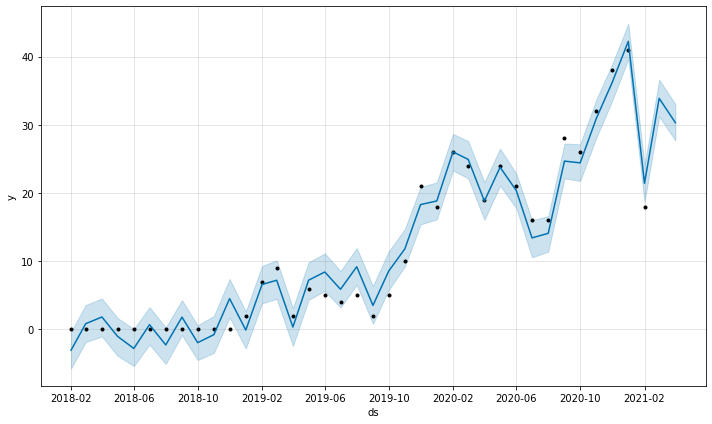

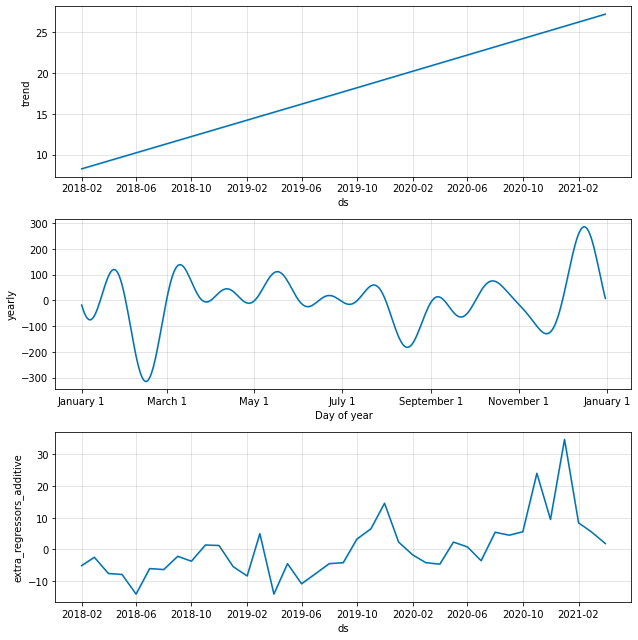

In [99]:
m = Prophet()
m.add_regressor('trends')
m.fit(sells)

future = m.make_future_dataframe(periods=future_periods, freq='MS') 

future['trends'] = trends.values.squeeze()
future.tail()

fcst = m.predict(future)
fig = m.plot(fcst)
fig2 = m.plot_components(fcst)
fig.show()
fig2.show()
